## 1. Data Wrangling

## Import

In [18]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import ppscore as pps

In [19]:
#import data 
mashable_data = pd.read_csv('/users/Philip/Documents/GitHub/Springboard/OnlineNewsPopularity/OnlineNewsPopularity.csv')

## Explore the data

In [20]:
mashable_data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [21]:
mashable_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [22]:
mashable_data.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [23]:
#check to see if there are any NaN or any missing values in the data
mashable_data.isnull().values.any()

False

## 2. Exploratory Data Analysis (EDA)

## Detecting Outliers

<AxesSubplot:>

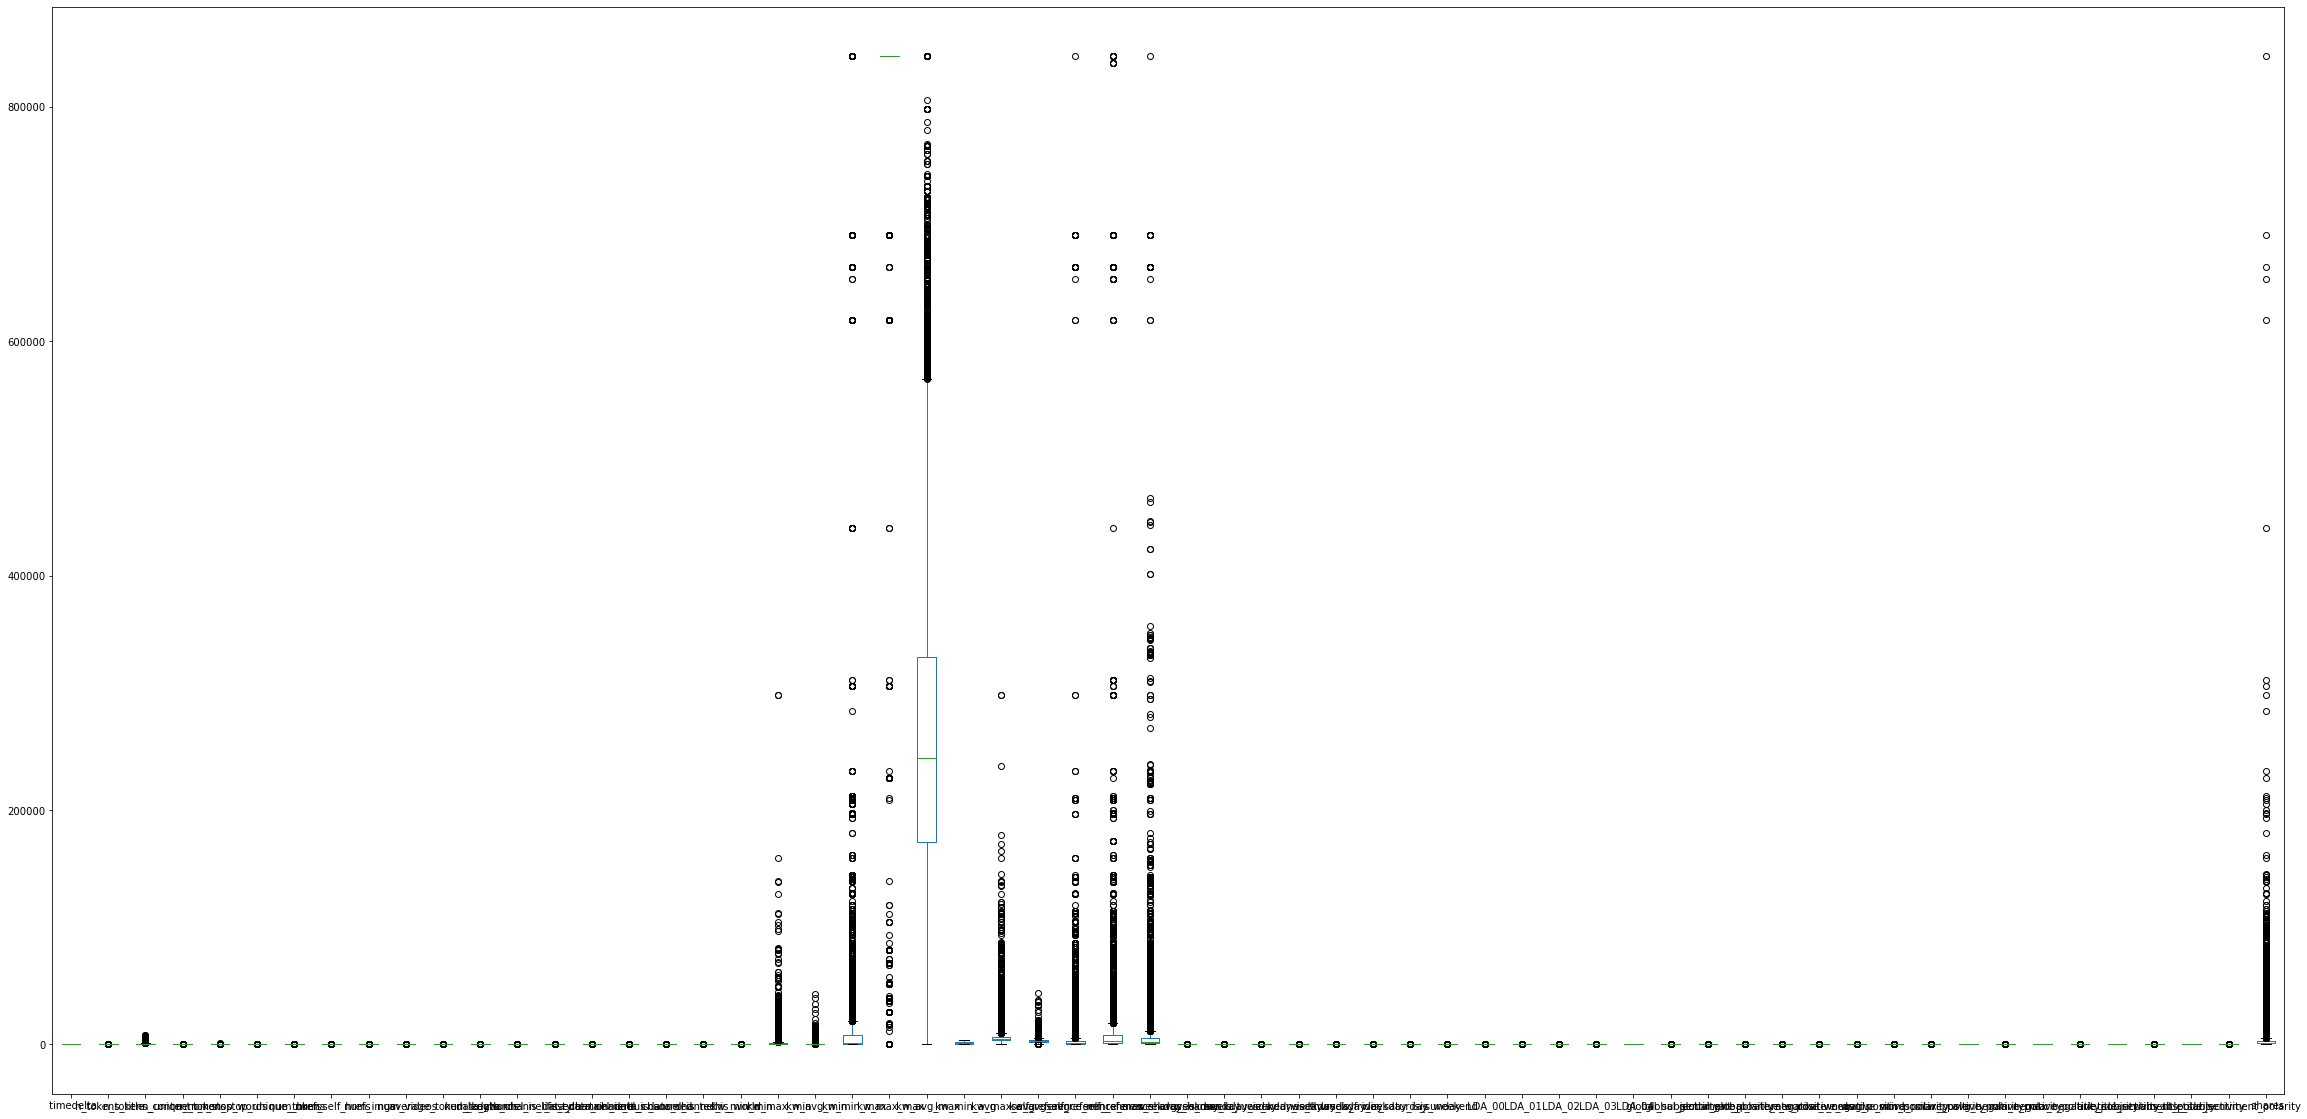

In [24]:
#check to see if there are outliers, in this case we can carely see there are outliers
mashable_data.plot(kind='box', figsize=(40,20))

In [25]:
#Dropping url in order to plot each columns to get a better reading since url contains no values or numbers
df_mashable_data = mashable_data.drop('url', 1)

<ipython-input-26-8b925fe162e6>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


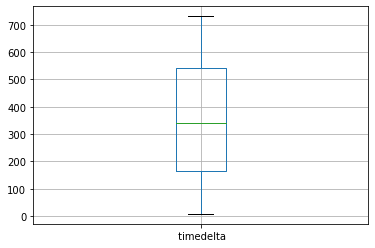

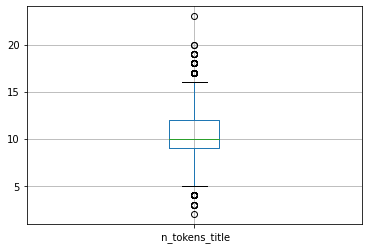

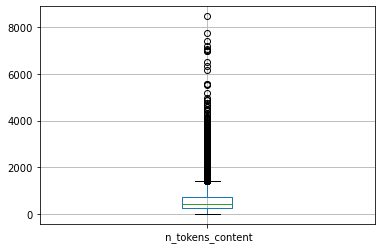

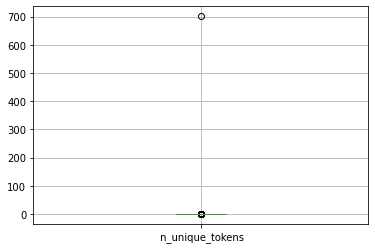

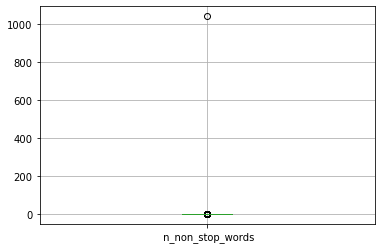

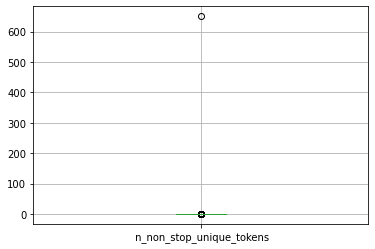

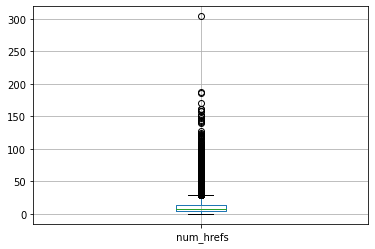

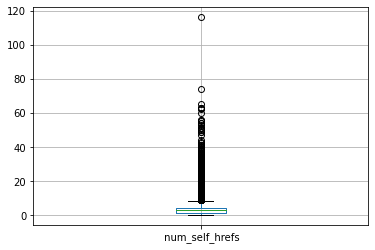

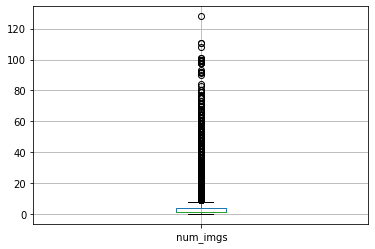

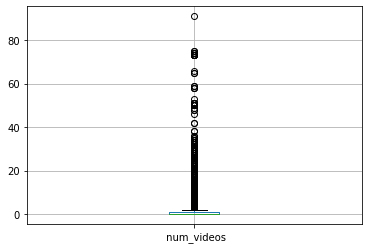

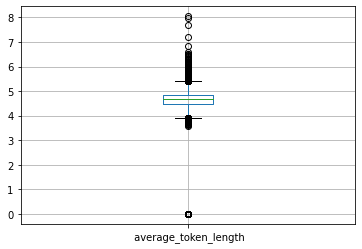

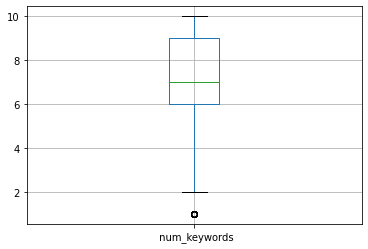

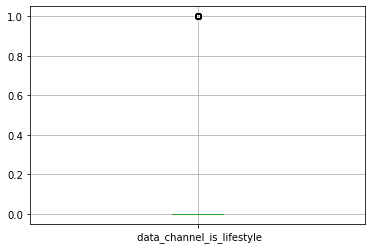

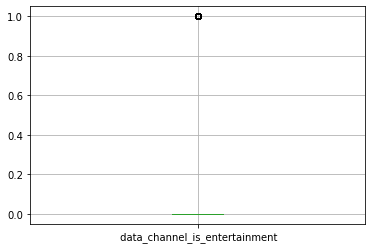

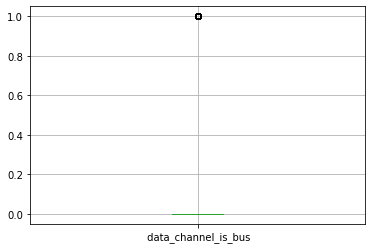

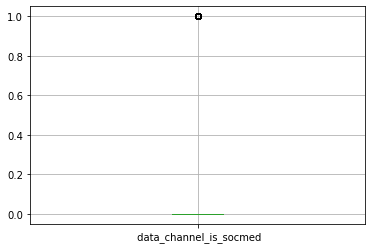

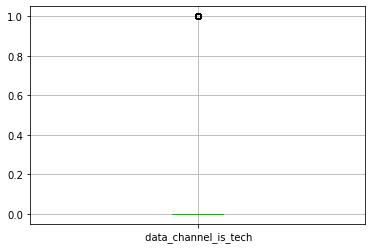

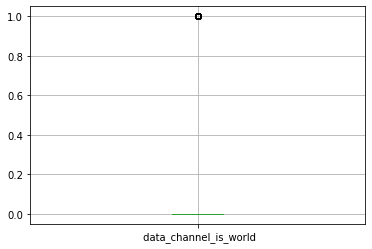

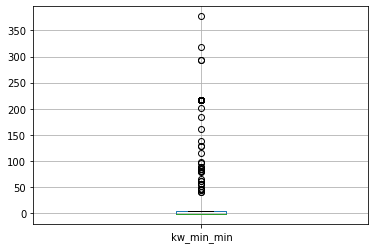

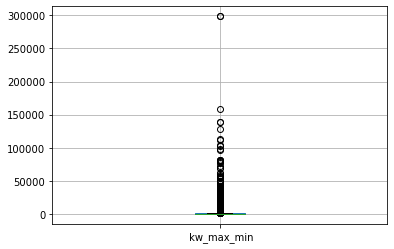

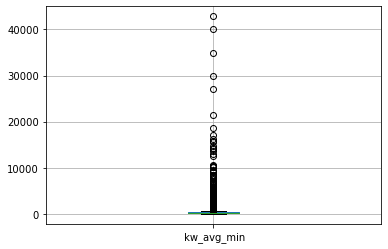

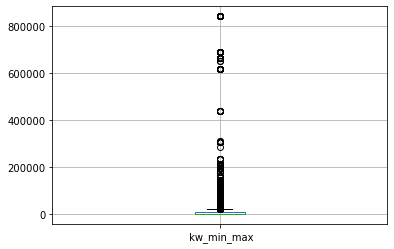

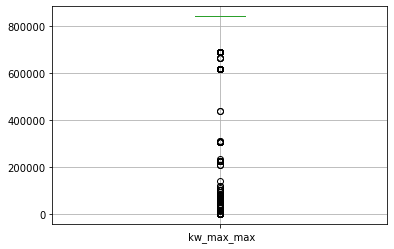

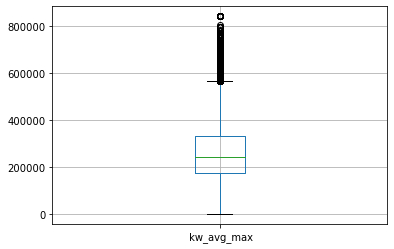

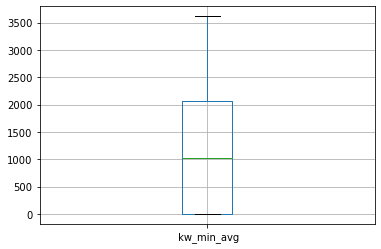

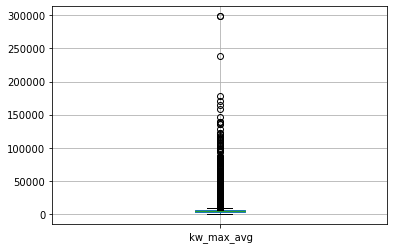

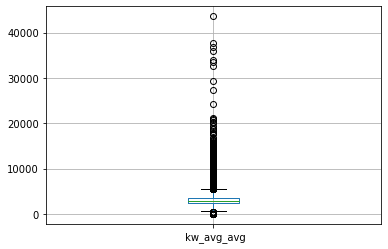

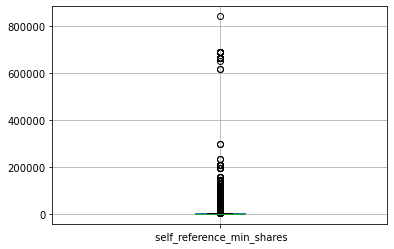

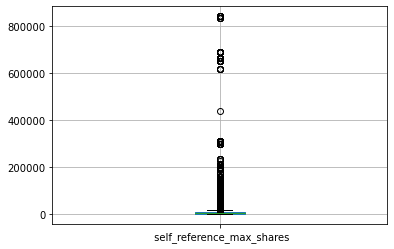

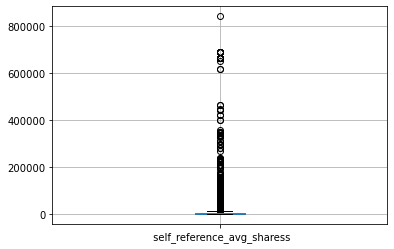

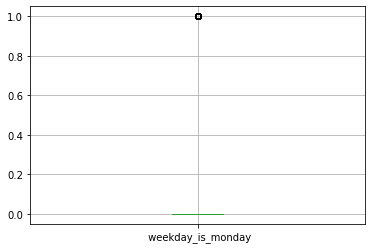

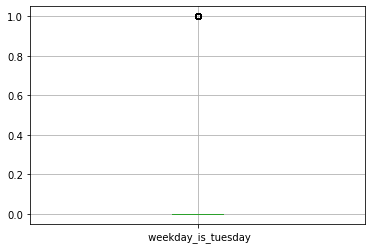

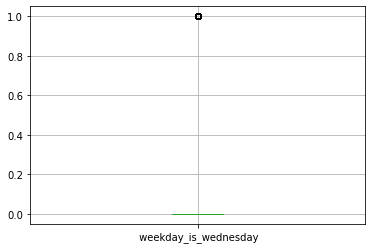

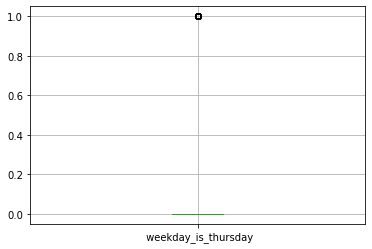

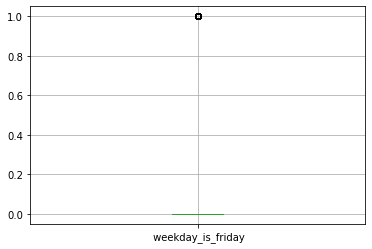

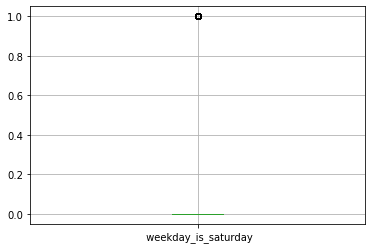

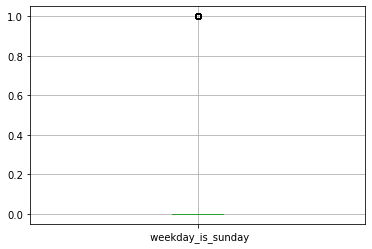

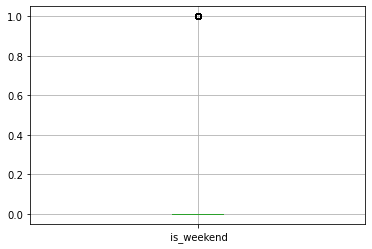

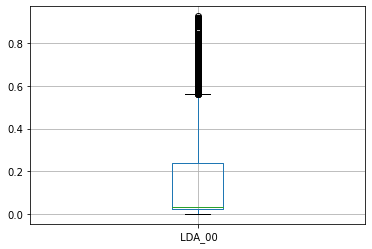

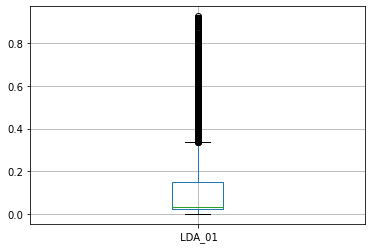

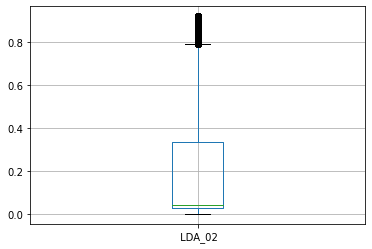

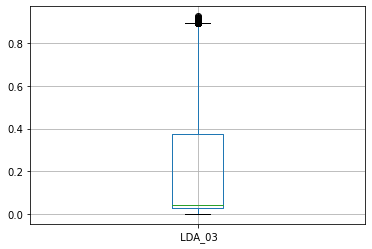

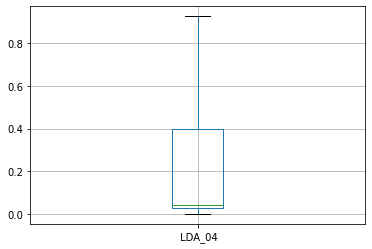

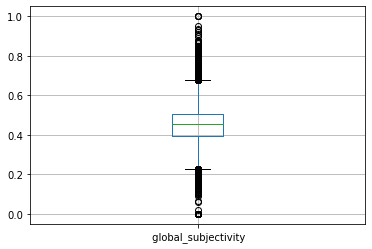

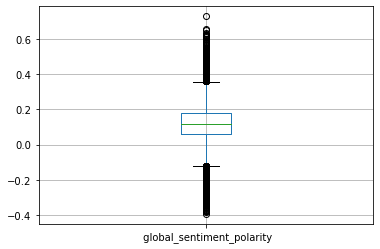

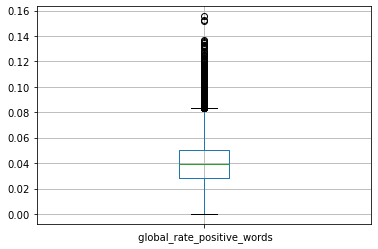

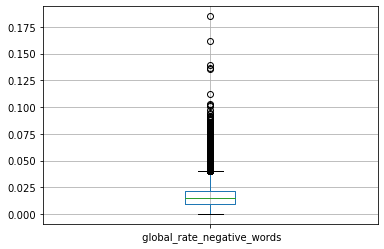

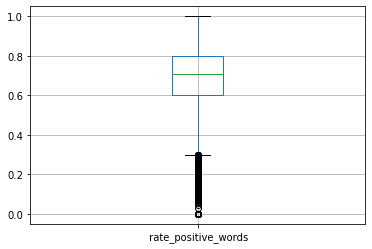

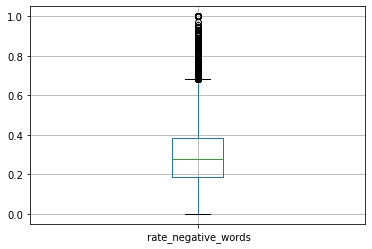

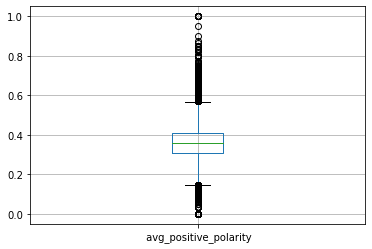

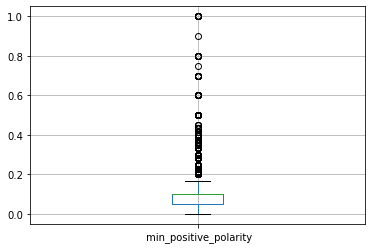

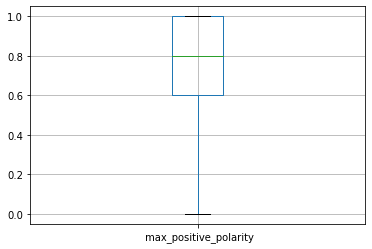

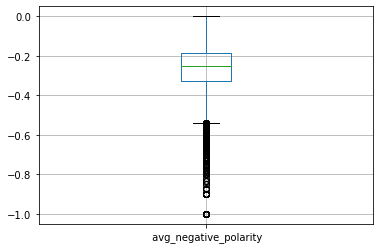

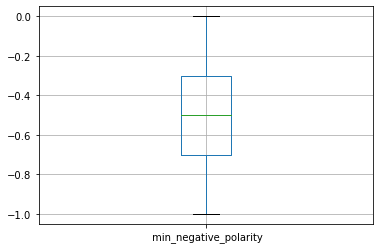

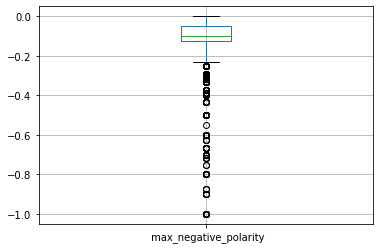

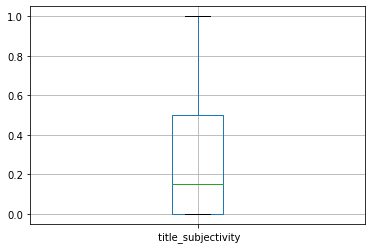

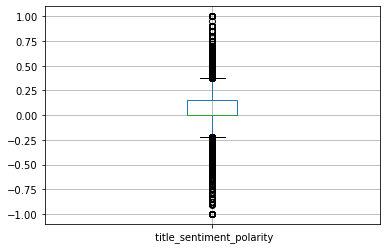

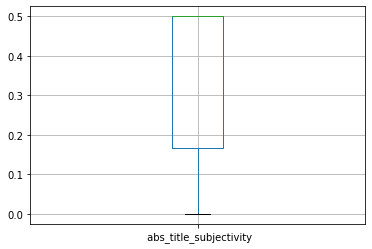

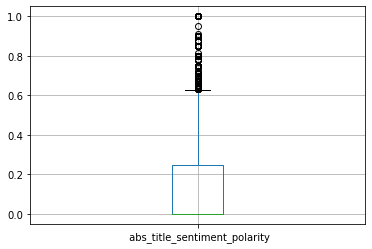

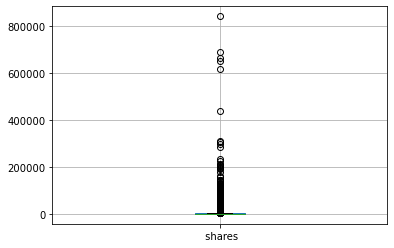

In [26]:
#create box plots for each columns to get a better read of the outliers
for column in df_mashable_data:
    plt.figure()
    df_mashable_data.boxplot([column])

## Removing Outliers 

In [27]:
#In these two cells we will remove the outliers using IQR (interquartile range) Method, this will help us create an accurate model later on.
df_filtered  = pd.DataFrame()
for column in df_mashable_data: 

    q_low = df_mashable_data[column].quantile(0.01)
    q_hi  = df_mashable_data[column].quantile(0.99)

    df = df_mashable_data[(df_mashable_data[column] < q_hi) & (df_mashable_data[column] > q_low)]
    column
    df_filtered = df_filtered.append(df)

In [28]:
Q1 = df_mashable_data.quantile(0.25)
Q3 = df_mashable_data.quantile(0.75)
IQR = Q3 - Q1

df_filtered = df_mashable_data[~((df_mashable_data < (Q1 - 1.5 * IQR)) |(df_mashable_data > (Q3 + 1.5 * IQR)))]

In [29]:
df_filtered.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593.0
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711.0
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500.0
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200.0
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,NaN,NaN,0.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505.0


<ipython-input-30-0c71dfcf8f3a>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


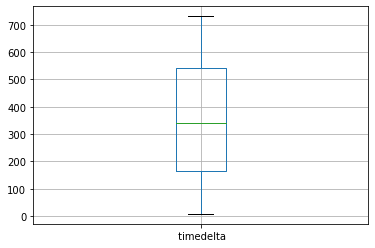

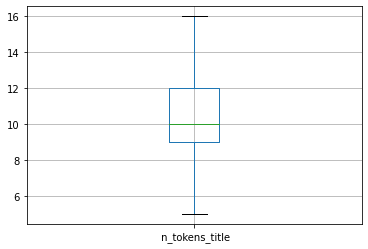

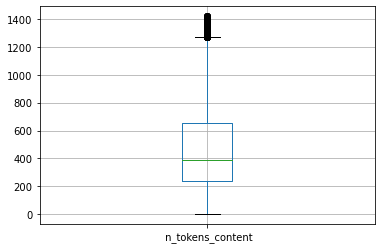

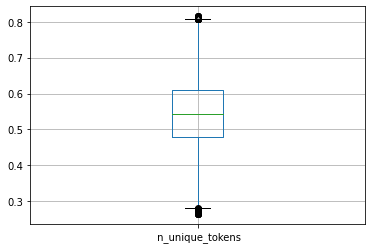

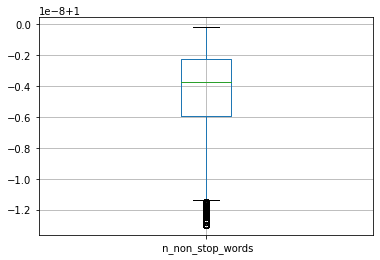

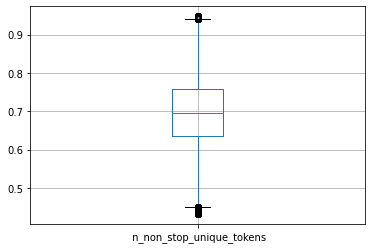

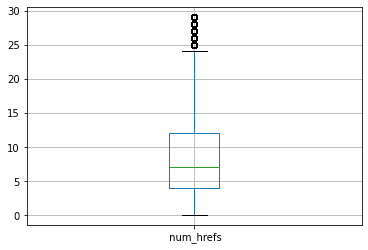

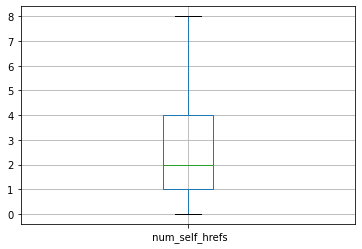

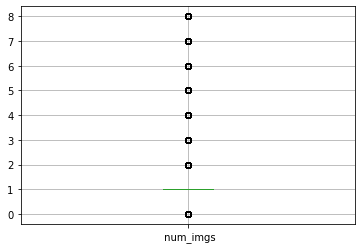

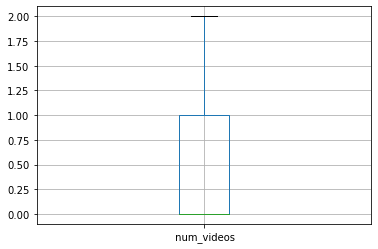

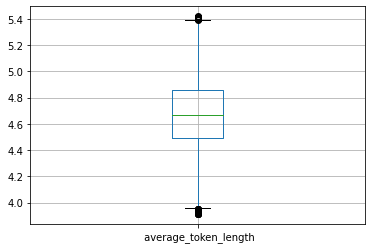

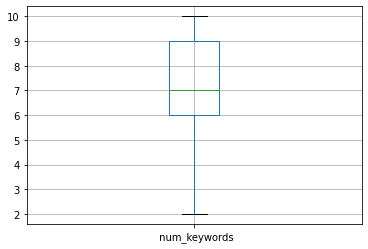

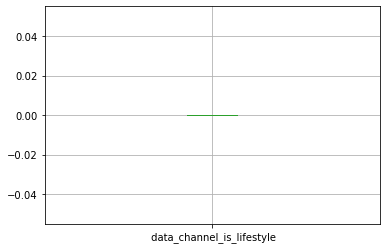

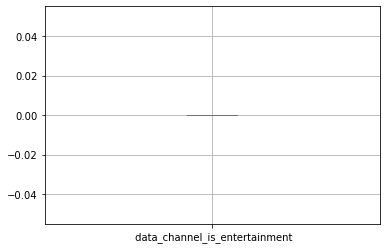

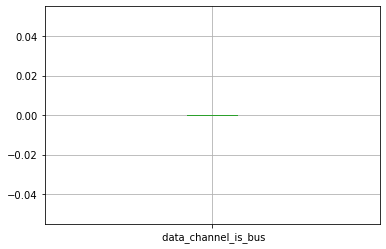

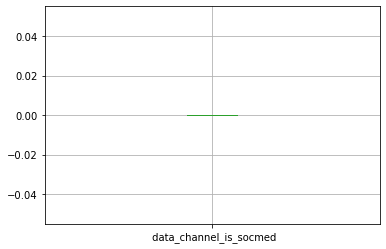

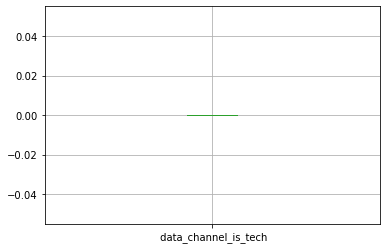

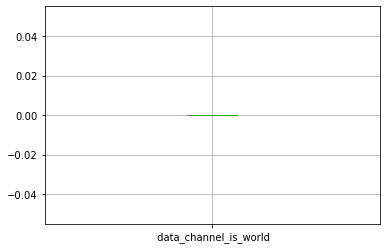

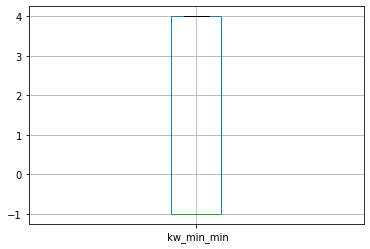

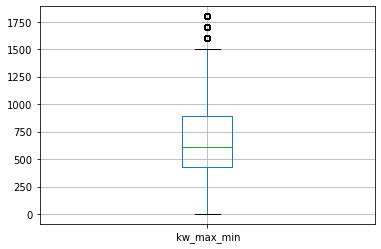

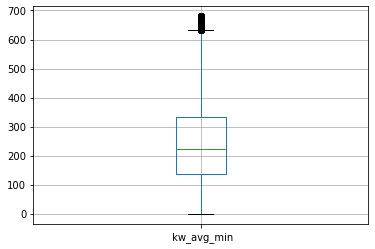

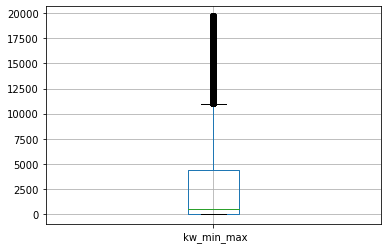

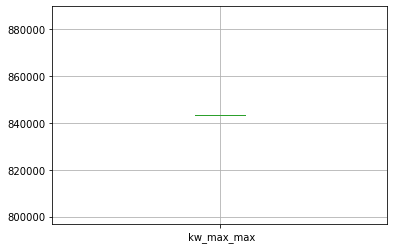

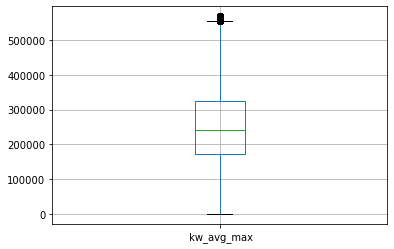

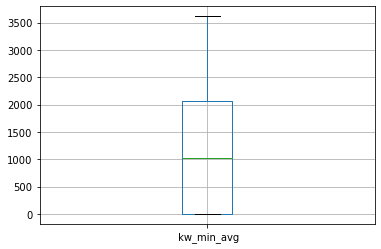

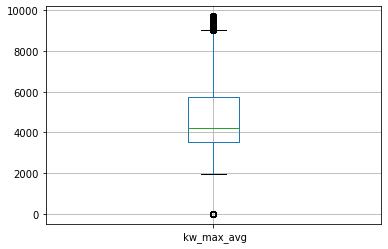

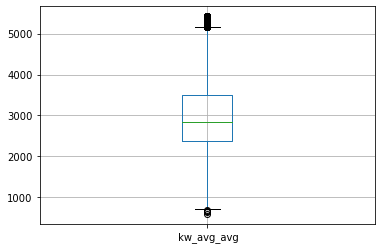

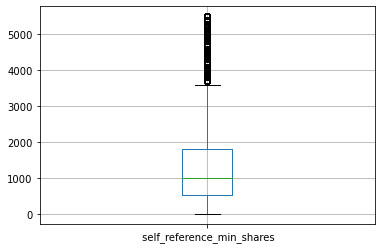

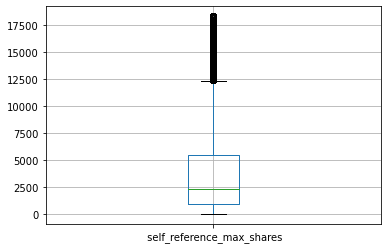

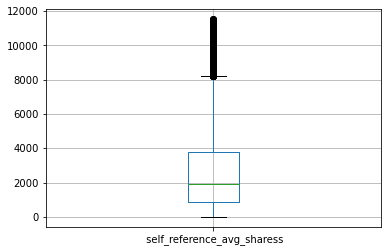

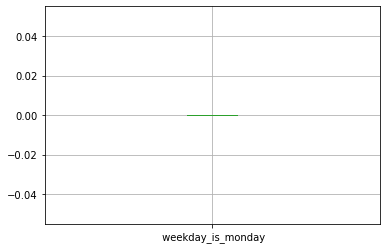

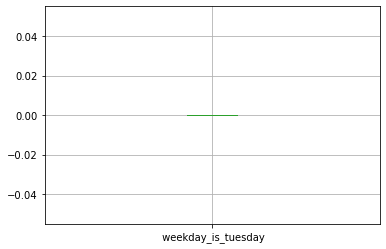

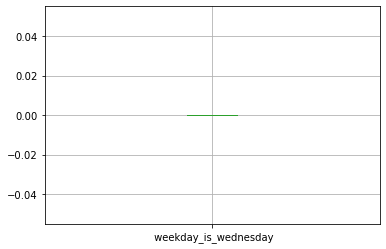

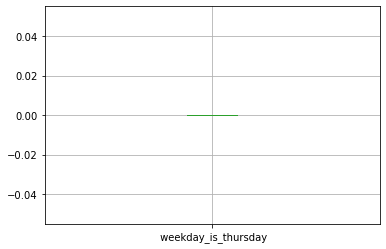

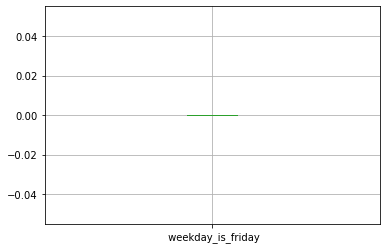

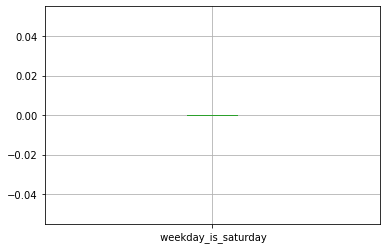

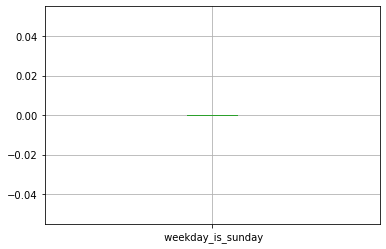

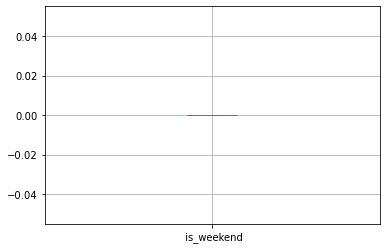

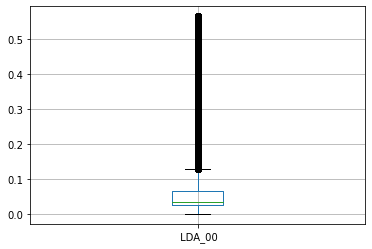

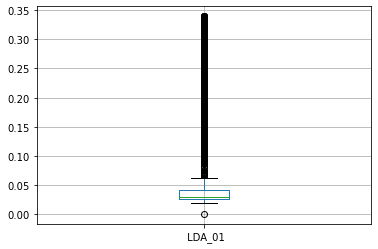

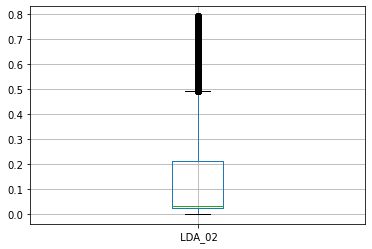

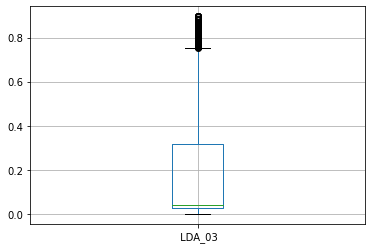

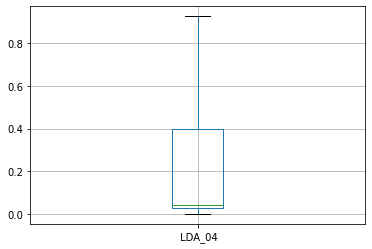

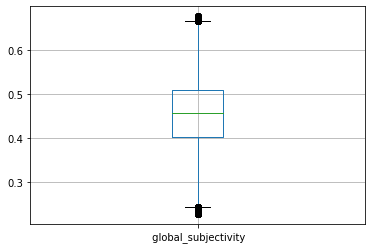

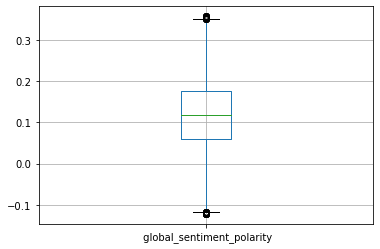

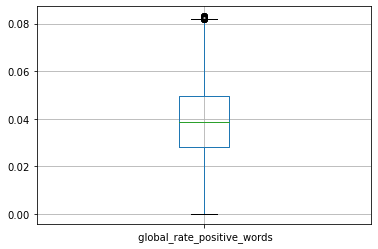

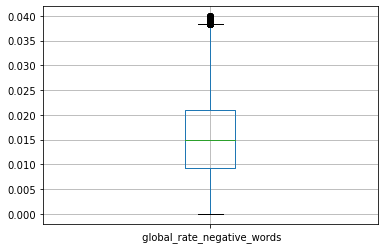

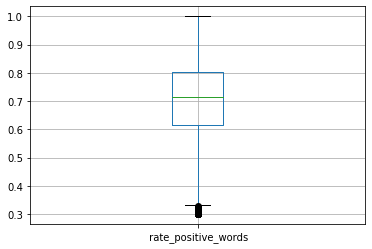

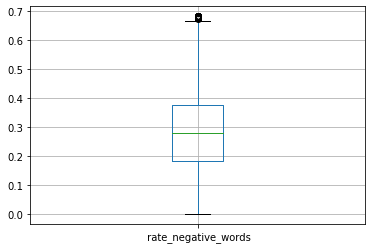

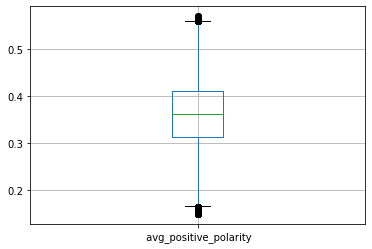

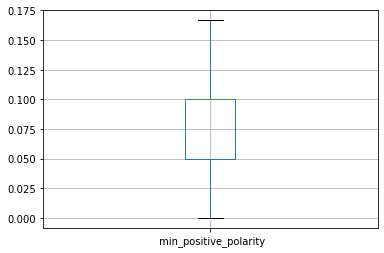

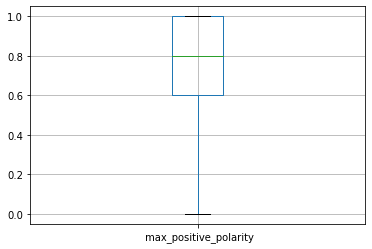

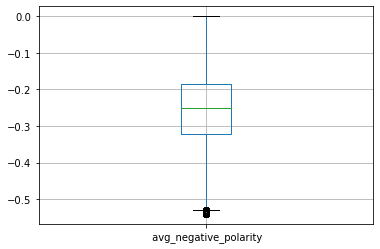

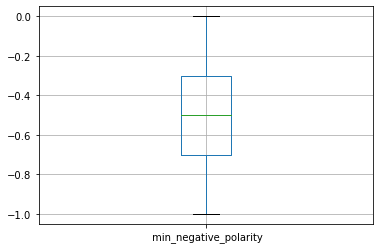

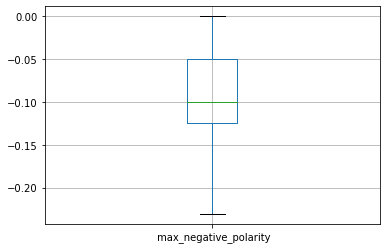

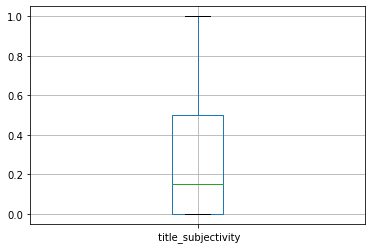

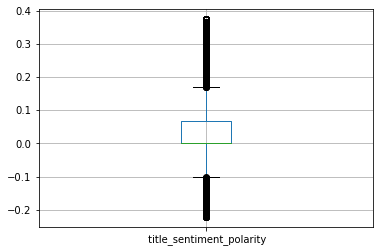

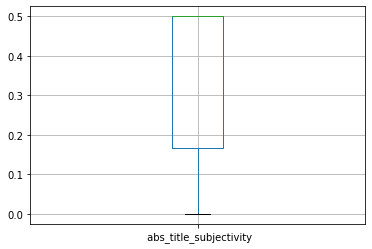

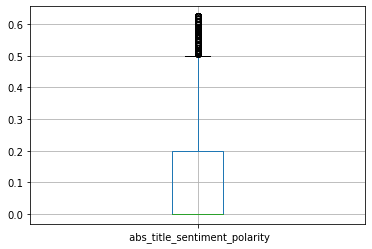

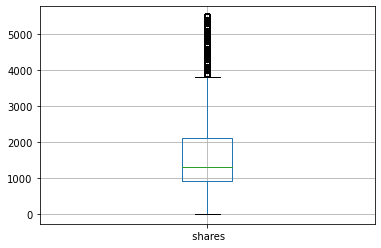

In [30]:
for column in df_filtered:
    plt.figure()
    df_filtered.boxplot([column])

<AxesSubplot:xlabel='x', ylabel='y'>

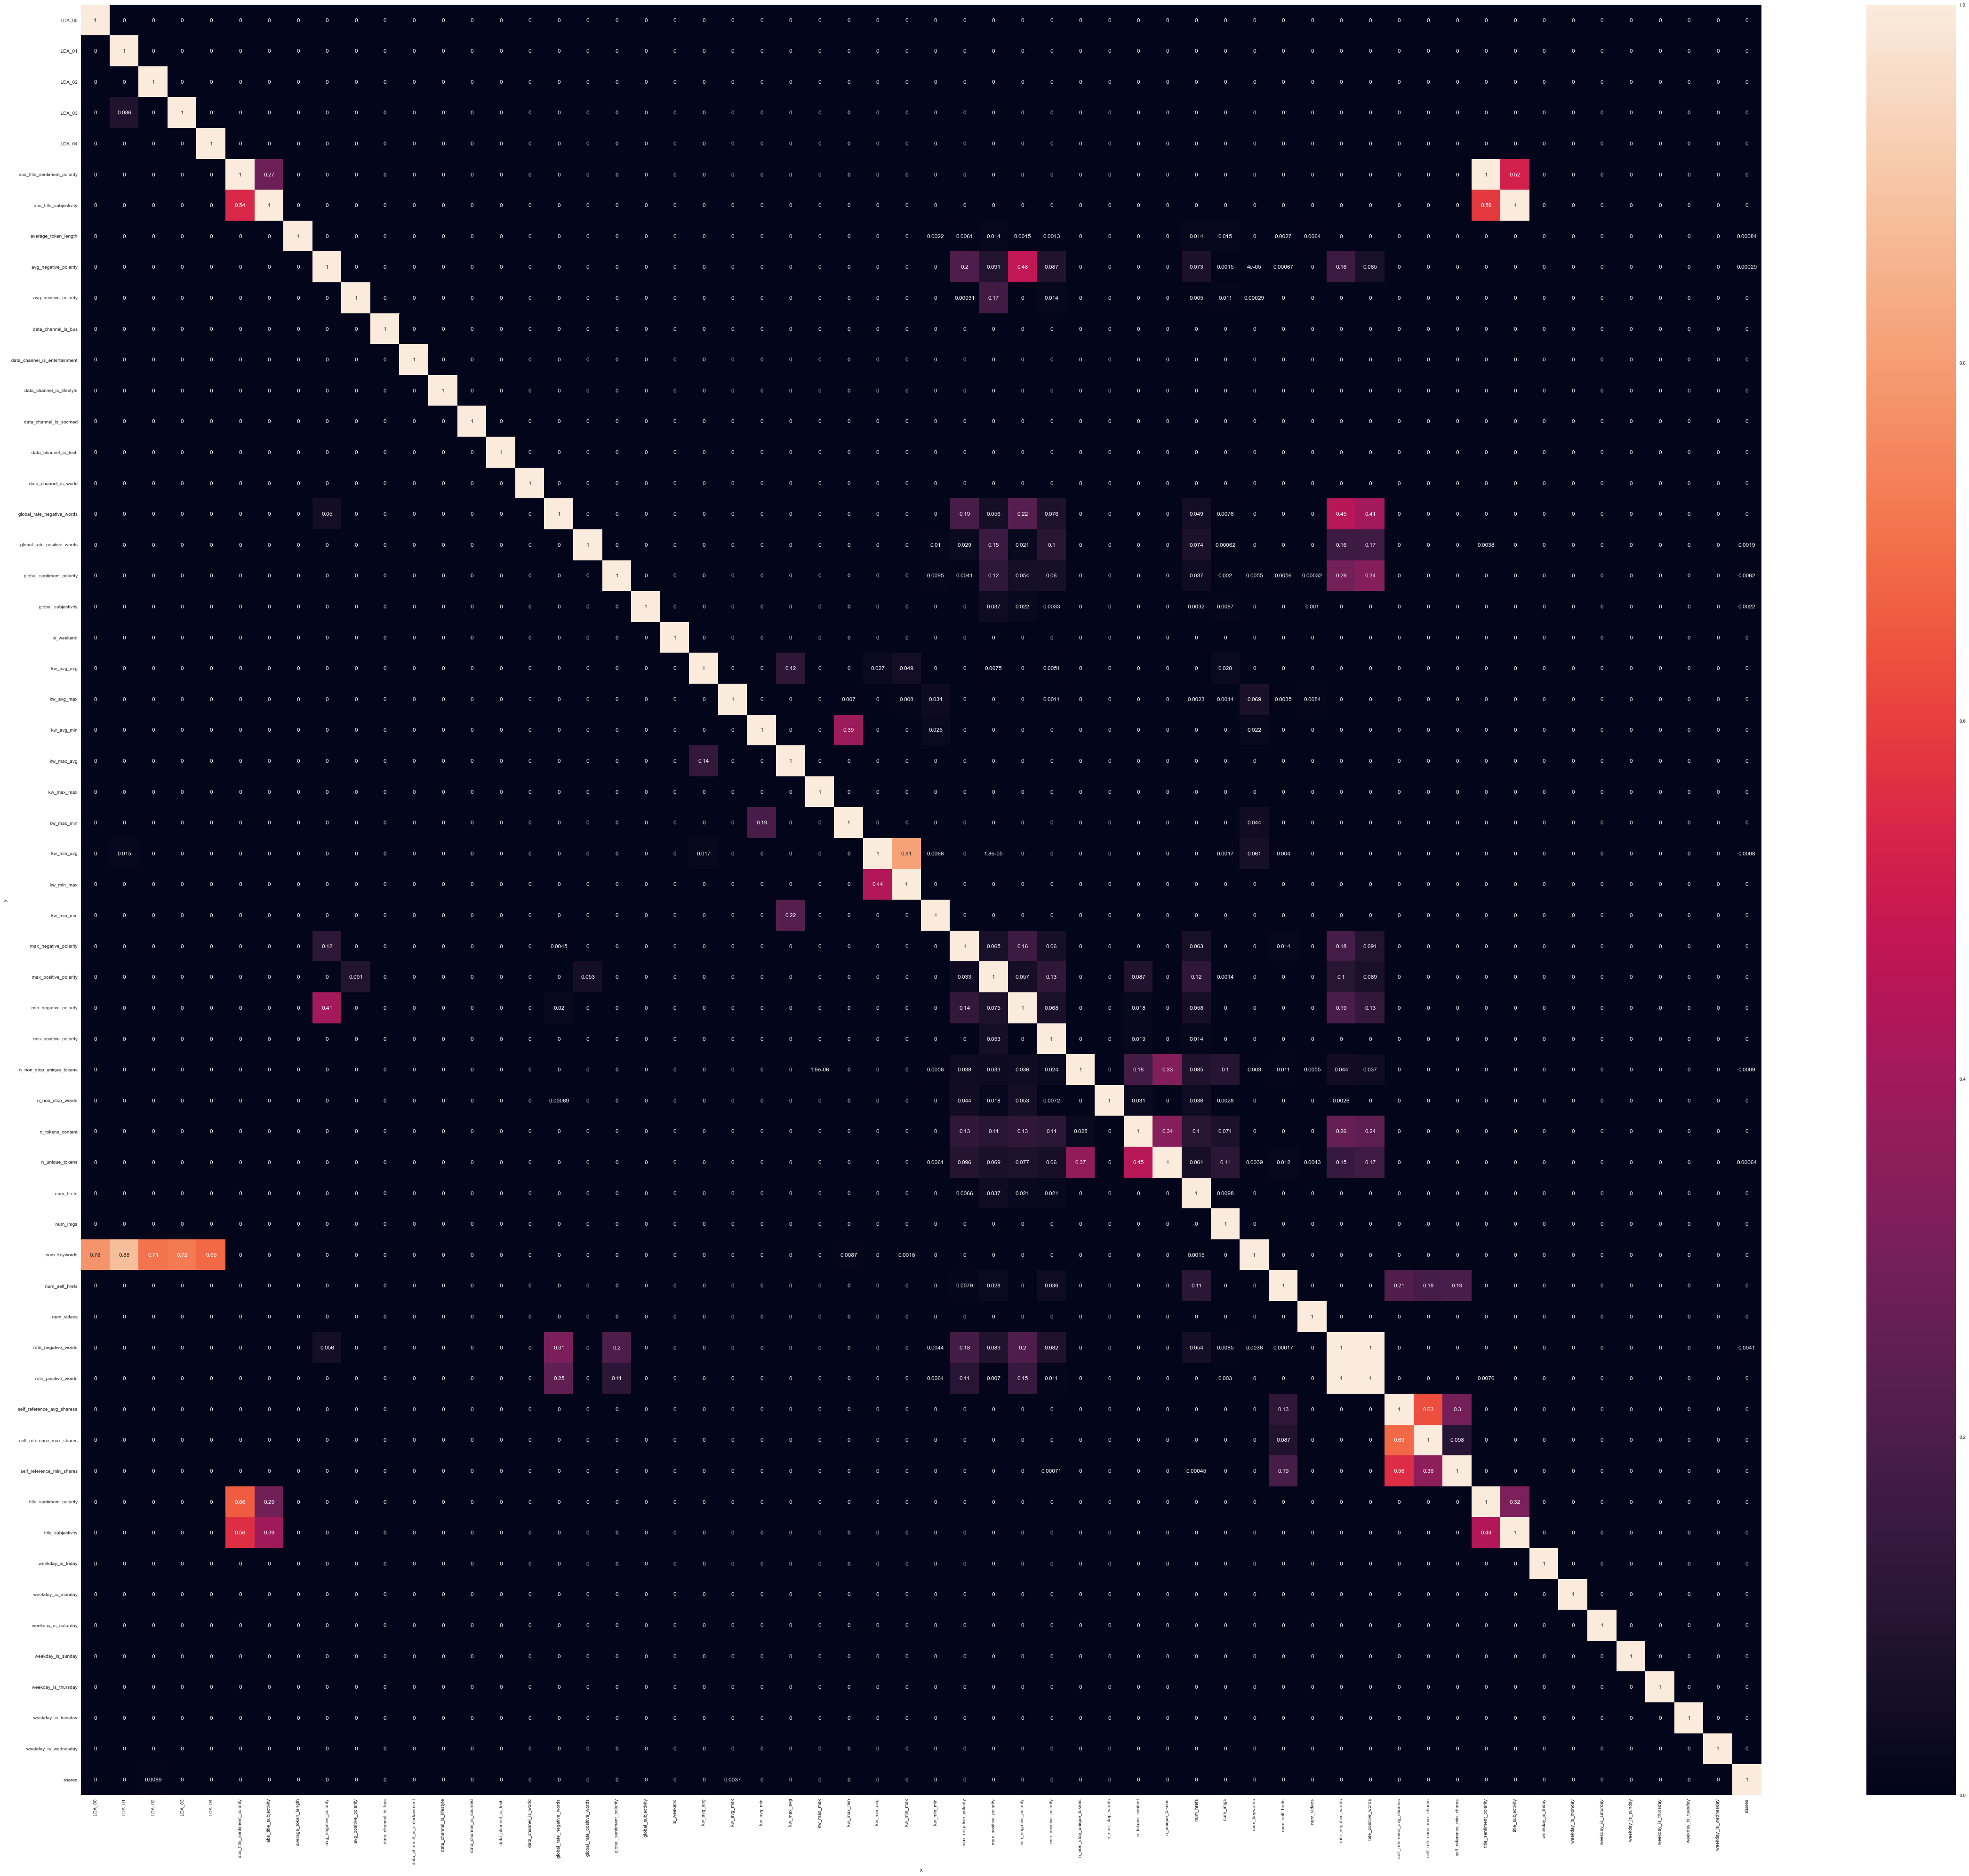

In [48]:
#seaborn heatmap of correlations in shares
plt.subplots(figsize=(80,70))
matrix_df = pps.matrix(df_filtered).pivot(columns='x', index='y',  values='ppscore')
sns.heatmap(matrix_df, annot=True)


## 3. Preprocessing and Training 

In [50]:
#we will use the classification module instead of the regression module because the regression module gave us very inaccurate models

In [33]:
#import pycaret classification module
from pycaret.classification import *

## Preprocessing

In [51]:
#the data is too big will take a long time to process
#we will pre-processed the data by selecting particular number of popular/unpopular shares
df_filtered.rename(columns={' shares': 'shares'}, inplace=True)
popular=df_filtered.shares>=1400
unpopular=df_filtered.shares<1400
df_filtered.loc[popular,'shares']=1
df_filtered.loc[unpopular,'shares']=0


features=list(df_filtered.columns[2:60])

df_filtered = df_filtered[features]

In [35]:
df_filtered.head()

,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,496.0,496.0,496.000000,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,NaN,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,0.0
1,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,0.0
2,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,918.0,918.0,918.000000,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,NaN,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1.0
3,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,NaN,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,0.0
4,1072.0,0.415646,1.0,0.540890,19.0,NaN,NaN,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,545.0,16000.0,3151.157895,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,0.0


In [36]:
df_filtered = df_filtered[df_filtered['shares'].notna()]

## Training 

In [37]:
# setup the dataset
clf1 = setup(data = df_filtered, target='shares', session_id=123)

,Description,Value
0,session_id,123
1,Target,shares
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(35103, 58)"
5,Missing Values,True
6,Numeric Features,36
7,Categorical Features,21
8,Ordinal Features,False
9,High Cardinality Features,False


In [52]:
#this will train all the models and help us select the best model to use
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.6644,0.7256,0.6138,0.6556,0.6339,0.3247,0.3254,4.4250
gbc,Gradient Boosting Classifier,0.6600,0.7203,0.6048,0.6521,0.6274,0.3156,0.3164,2.3350
lightgbm,Light Gradient Boosting Machine,0.6597,0.7209,0.6025,0.6525,0.6264,0.3148,0.3157,0.2340
et,Extra Trees Classifier,0.6574,0.7140,0.5908,0.6528,0.6202,0.3095,0.3109,0.9900
rf,Random Forest Classifier,0.6554,0.7128,0.5928,0.6493,0.6196,0.3059,0.3070,1.1350
ada,Ada Boost Classifier,0.6552,0.7110,0.6026,0.6458,0.6234,0.3062,0.3069,0.5310
ridge,Ridge Classifier,0.6475,0.0000,0.5793,0.6417,0.6087,0.2895,0.2909,0.0290
lda,Linear Discriminant Analysis,0.6472,0.7018,0.5783,0.6415,0.6081,0.2888,0.2902,0.2760
nb,Naive Bayes,0.5850,0.6196,0.4655,0.5767,0.5151,0.1595,0.1623,0.0340
dt,Decision Tree Classifier,0.5725,0.5716,0.5540,0.5482,0.5510,0.1430,0.1431,0.1580


## 4. Modeling 

In [53]:
#create the model catboost classifier
catboost = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6591,0.7184,0.6151,0.6474,0.6308,0.3145,0.3149
1,0.6615,0.7198,0.5902,0.6593,0.6228,0.3175,0.3191
2,0.6659,0.7258,0.6053,0.6604,0.6317,0.3270,0.3280
3,0.6695,0.7365,0.6242,0.6594,0.6413,0.3354,0.3358
4,0.6671,0.7344,0.6053,0.6623,0.6325,0.3293,0.3304
5,0.6459,0.7093,0.6040,0.6322,0.6178,0.2883,0.2885
6,0.6577,0.7173,0.5997,0.6505,0.6241,0.3108,0.3117
7,0.6748,0.7372,0.6289,0.6661,0.6469,0.3460,0.3465
8,0.6654,0.7265,0.6237,0.6541,0.6385,0.3275,0.3278
9,0.6768,0.7307,0.6418,0.6646,0.6530,0.3508,0.3510


In [54]:
#tune the hyperparameters of the catboost classifier model
tuned_catboost = tune_model(catboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6603,0.7197,0.6048,0.6525,0.6277,0.3162,0.3169
1,0.6538,0.7119,0.5799,0.6509,0.6134,0.3018,0.3035
2,0.6634,0.7236,0.5959,0.6600,0.6263,0.3216,0.3230
3,0.6764,0.7404,0.6036,0.6776,0.6385,0.3474,0.3493
4,0.6716,0.7387,0.5993,0.6715,0.6333,0.3376,0.3394
5,0.6463,0.7060,0.5936,0.6357,0.6139,0.2883,0.2889
6,0.6654,0.7170,0.5997,0.6622,0.6294,0.3259,0.3272
7,0.6748,0.7379,0.6220,0.6685,0.6444,0.3455,0.3463
8,0.6610,0.7237,0.6332,0.6448,0.6389,0.3195,0.3195
9,0.6736,0.7254,0.6323,0.6631,0.6473,0.3438,0.3442


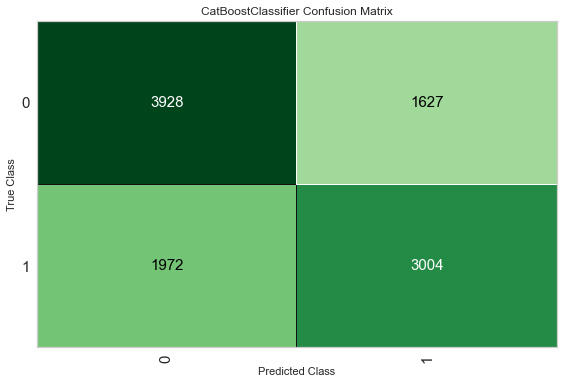

In [41]:
#confusion matrix
plot_model(tuned_catboost, plot = 'confusion_matrix')

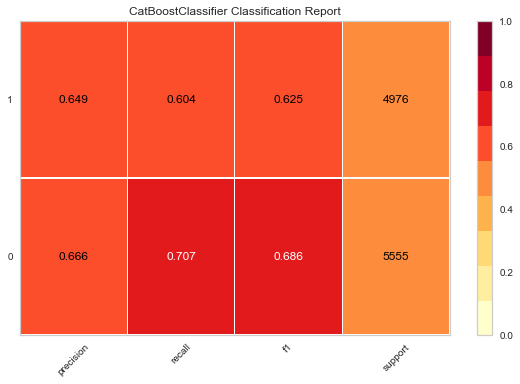

In [42]:
#classification report
plot_model(tuned_catboost, plot = 'class_report')

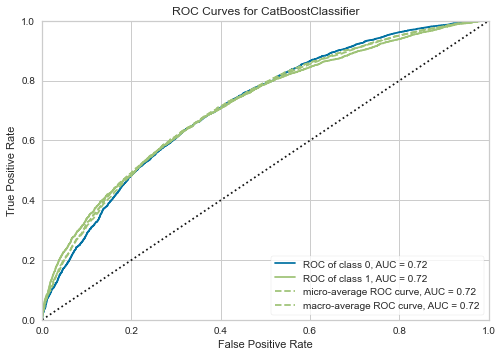

In [43]:
#AUC
plot_model(tuned_catboost, plot = 'auc')

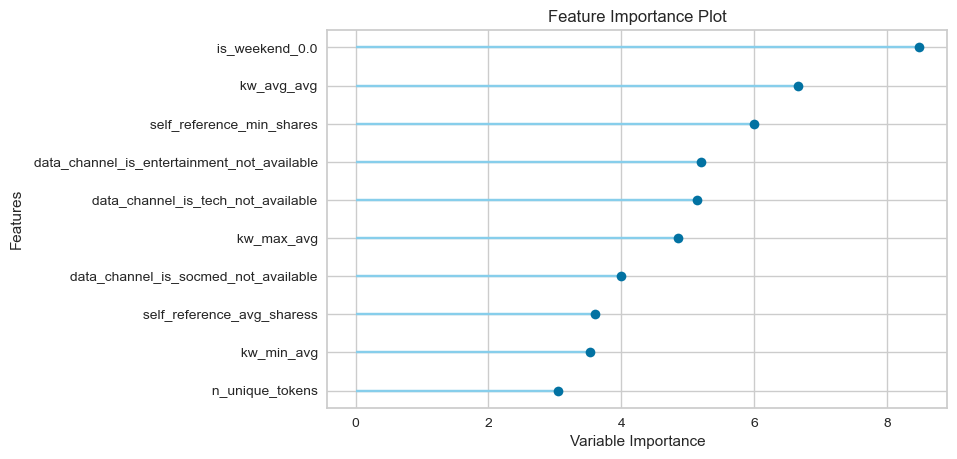

In [44]:
#feature importance
plot_model(tuned_catboost, plot = 'feature')

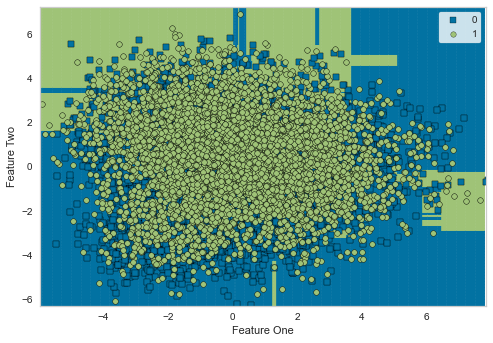

In [45]:
#decision boundary plot
plot_model(tuned_catboost, plot = 'boundary')

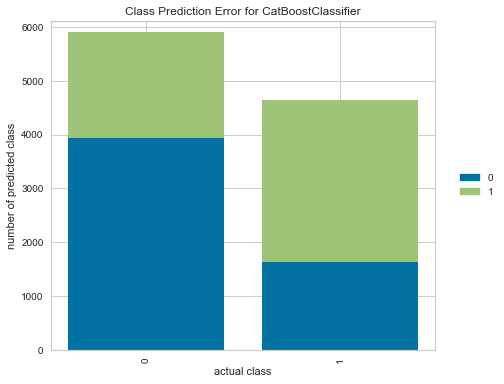

In [46]:
#prediction error plot
plot_model(tuned_catboost, plot = 'error')

In [47]:
#prediction
predict_model(tuned_catboost);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.6582,0.7155,0.6037,0.6487,0.6254,0.3119,0.3126
